# Mini Project: Worker Productivity Analysis  
This project explores user activity patterns using a trimmed dataset of e-commerce event logs. Two specific behaviors are analyzed: event frequency (most active users) and time gaps between actions.



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Train.csv to Train.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Train.csv")
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [ ]:
df.rename(columns={'Reached.on.Time_Y.N': 'Delivered_On_Time'}, inplace=True)
df['Delivered_On_Time'] = df['Delivered_On_Time'].map({1: 1, 0: 0})
df.to_csv("delivery_delay_cleaned.csv", index=False)



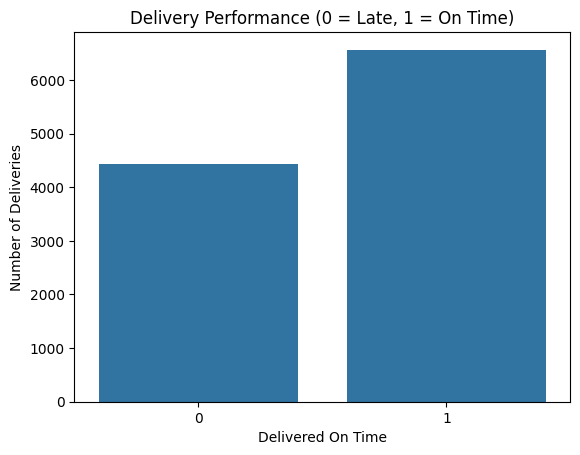

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot: Overall delivery performance

sns.countplot(x='Delivered_On_Time', data=df)
plt.title('Delivery Performance (0 = Late, 1 = On Time)')
plt.xlabel('Delivered On Time')
plt.ylabel('Number of Deliveries')
plt.show()

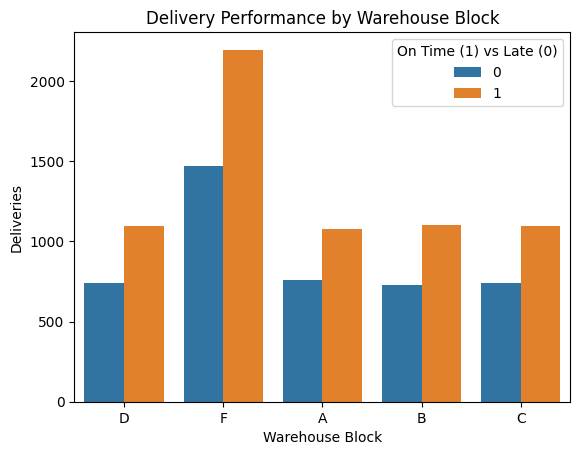

In [ ]:
# Delivery Rate by Warehouse Block
sns.countplot(x='Warehouse_block', hue='Delivered_On_Time', data=df)
plt.title('Delivery Performance by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Deliveries')
plt.legend(title='On Time (1) vs Late (0)')
plt.show()

This helps you identify which warehouses are less efficient

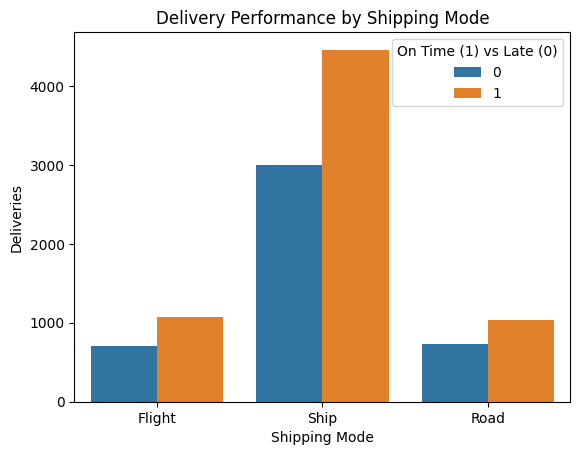

In [ ]:
#Delivery Rate by Mide of Shipment
sns.countplot(x='Mode_of_Shipment', hue='Delivered_On_Time', data=df)
plt.title('Delivery Performance by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Deliveries')
plt.legend(title='On Time (1) vs Late (0)')
plt.show()

Revelas whether standard shipping or flight results in more late deliveries

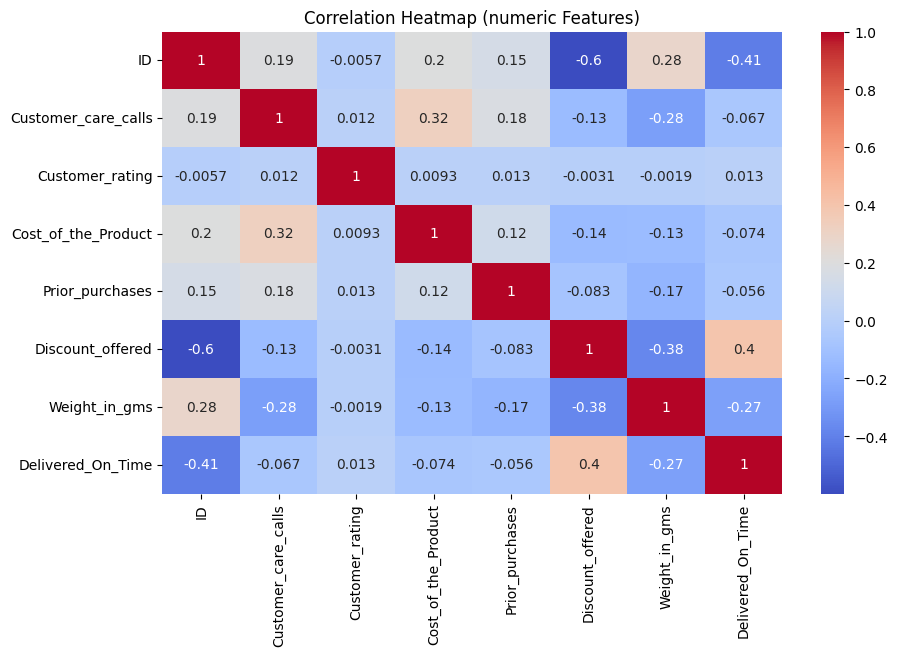

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include= 'number') # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (numeric Features)')
plt.show()

In [ ]:
df.groupby('Delivered_On_Time')[['Weight_in_gms', 'Cost_of_the_Product', 'Discount_offered']].mean()

,Weight_in_gms,Cost_of_the_Product,Discount_offered
Delivered_On_Time,,,
0,4168.668395,214.498647,5.545987
1,3272.640104,207.289197,18.663721


Late Deliveries are heavier , cheaper, and more discounted possibily indicating slower fulfillment on bulk sale items.

In [5]:
from google.colab import files
uploaded = files.upload()



Saving worker_productivity_data.csv to worker_productivity_data.csv


In [6]:
import pandas as pd

# Load the CSV
df = pd.read_csv("worker_productivity_data.csv")

# View the first few rows
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [7]:
# Check the shape (rows, columns)
df.shape

# Check for missing values
df.isnull().sum()

# Data types of each column
df.dtypes


,0
event_time,object
event_type,object
product_id,int64
category_id,int64
category_code,object
brand,object
price,float64
user_id,int64
user_session,object


In [10]:
df.columns


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [11]:
df = df.drop(columns=['product_id', 'category_id', 'user_session'])

In [14]:
df['event_time'] = pd.to_datetime(df['event_time'])


In [15]:
df = df.sort_values(by=['user_id', 'event_time'])


In [16]:
user_activity = df['user_id'].value_counts()
user_activity.head()


,count
user_id,
528769528,43
531063605,31
538015502,28
512975726,27
543103721,25


# Mini Project: E-Commerce Behavior Analysis  
This analysis focuses on identifying user activity levels and behavioral timing patterns in a trimmed dataset of 1,099 records.


<Axes: title={'center': 'User Activity per Day'}, xlabel='date'>

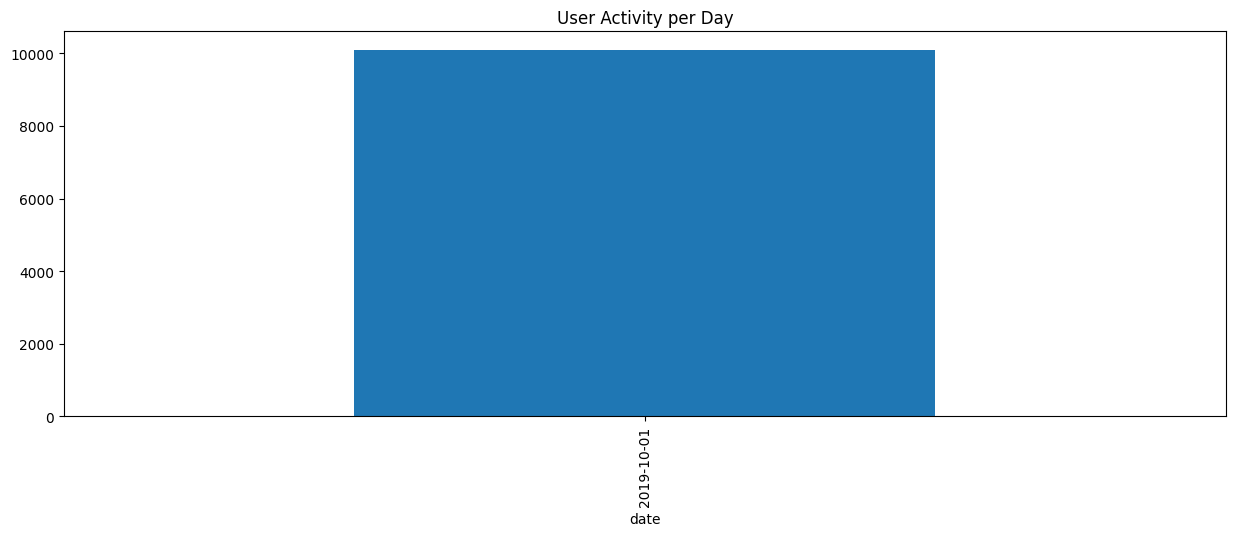

In [17]:
df['date'] = df['event_time'].dt.date
df['date'].value_counts().sort_index().plot(kind='bar', figsize=(15,5), title='User Activity per Day')


<Axes: title={'center': 'Top 10 Most Active Users'}, xlabel='user_id'>

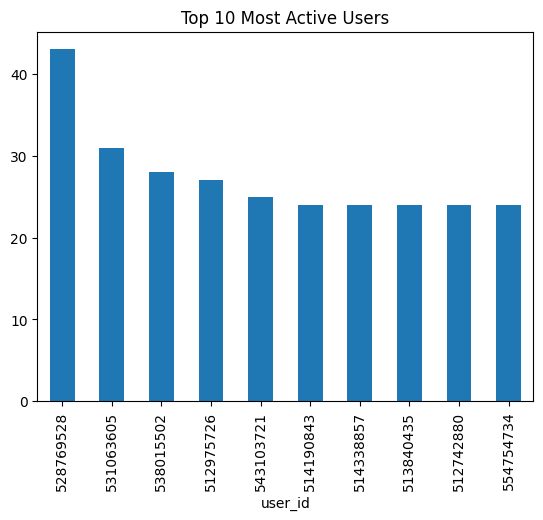

In [18]:
df['user_id'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Active Users')

In [21]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['time_diff'] = df.groupby('user_id')['event_time'].diff()
df[['user_id', 'event_time', 'time_diff']].head()



,user_id,event_time,time_diff
1150,306441847,2019-10-01 01:32:09+00:00,NaT
2774,400972610,2019-10-01 02:23:02+00:00,NaT
2936,400972610,2019-10-01 02:23:27+00:00,0 days 00:00:25
3063,400972610,2019-10-01 02:23:49+00:00,0 days 00:00:22
3106,400972610,2019-10-01 02:23:56+00:00,0 days 00:00:07


## Insight A: Top 10 Most Active Users  
This bar chart identifies the most active users based on number of events recorded. These users could be power users or test accounts. Understanding usage frequency helps target support, streamline system load, and detect automation.


### Insight: Time Between Events
This output shows the time gap between each action for a user. Small time differences suggest rapid, focused engagement, while large gaps may indicate passive use or breaks. This can reveal user habits and session structure.


## Conclusion  
In this project, we explored two core aspects of worker behavior using event-based logs: the most active users and the timing between events. These insights support productivity measurement, help identify efficiency trends, and lay the groundwork for more advanced modeling.
